In [1]:
%load_ext autoreload
%autoreload 2

In [278]:
import seaborn as sns
sns.set()

## Load corpus

In [2]:
from utils import load_data

In [3]:
corpus = load_data("my-dataset/")

In [4]:
corpus.shape

(1904, 9)

In [5]:
documents = corpus['selftext'].tolist()

In [6]:
print(documents[0])

New Years' Eve. And I'm working tonight. It's always the worst night of the year for us. Tonight is when the monsters come out. They've been with us for as long as we can remember now. 

They're always around, but it is New Years' Eve on which they get worse. Something seems to get into people. They're drawn to the monsters. We try to fight them, try to get the people to safety, tend to their injuries. Every year, hundreds of people get maimed, injured. Some even die. Not so many anymore, we've learnt how to deal with the evil that lurks in our world.

I watch the clock tick towards the inevitable start of the chaos, of the attacks. My tools are near me and I check them once again. Everything's there. Ready. Only a few minutes left now. I move to the canteen, to my brothers and sisters in arms. We're all ready for tonight's battle. While the minutes count down we wait, anxious for both the new year and the task that lays ahead of us.

The monsters are outside, waiting. Waiting to be re

## Preprocess documents

In [12]:
from utils import preprocess_pipeline

In [13]:
import time

In [14]:
start = time.time()
preprocessed_documents = [preprocess_pipeline(s) for s in documents]
print(f"Preprocessing time: {time.time()-start:.1f}s.")

Preprocessing time: 0.9s.


In [15]:
print(preprocessed_documents[0])

new years' eve and i'm working tonight it's always the worst night of the year for us tonight is when the monsters come out they've been with us for as long as we can remember now they're always around but it is new years' eve on which they get worse something seems to get into people they're drawn to the monsters we try to fight them try to get the people to safety tend to their injuries every year hundreds of people get maimed injured some even die not so many anymore we've learnt how to deal with the evil that lurks in our world i watch the clock tick towards the inevitable start of the chaos of the attacks my tools are near me and i check them once again everything's there ready only a few minutes left now i move to the canteen to my brothers and sisters in arms we're all ready for tonight's battle while the minutes count down we wait anxious for both the new year and the task that lays ahead of us the monsters are outside waiting waiting to be released by the striking of the clock

## Vectorize with frequency counts

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
import nltk

In [44]:
from nltk.corpus import stopwords

In [238]:
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, stop_words=stopwords.words('english')+['like', 'said', 'could', 'would', 'one', 'know', 'us'], max_features=1000)

In [239]:
tf = tf_vectorizer.fit_transform(preprocessed_documents).toarray()

In [240]:
features = tf_vectorizer.get_feature_names_out()

In [241]:
tf.shape

(1904, 1000)

In [242]:
len(features)

1000

In [243]:
import pandas as pd

In [244]:
import matplotlib.pyplot as plt

In [245]:
vocab_count = pd.DataFrame(tf.sum(axis=0), index=features, columns=['count'])

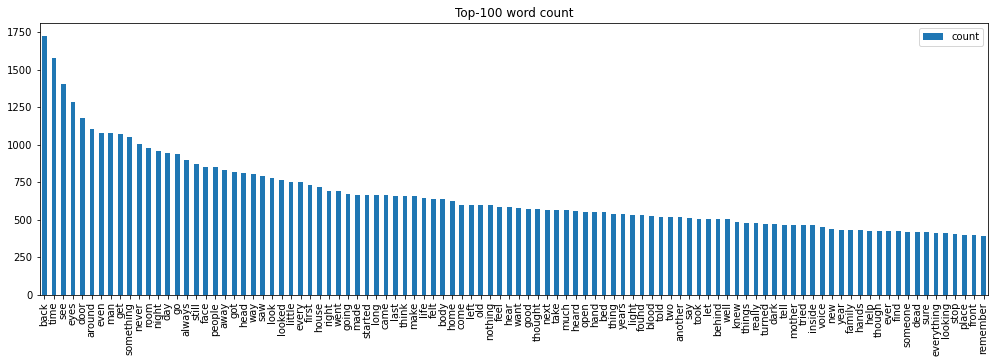

In [246]:
vocab_count.sort_values('count', ascending=False).iloc[:100,:].plot.bar(figsize=(17,5))
plt.title("Top-100 word count")
plt.show()

## Topic modelling with LDA

In [281]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [282]:
from utils import print_topics, get_topics_top_words

In [283]:
n_topics = 10

In [251]:
model = LDA(n_components=n_topics)

In [252]:
doc_topic = model.fit_transform(tf)

In [272]:
from sklearn.metrics.pairwise import cosine_similarity

In [274]:
similarity_matrix = cosine_similarity(doc_topic)

In [275]:
from utils import remove_tril

In [276]:
aux = remove_tril(similarity_matrix)

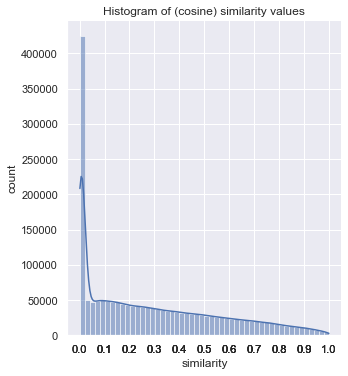

In [280]:
nbins = 50
sns.displot(aux, kind='hist', kde=True, bins=nbins)
plt.xticks(np.linspace(0, 1, nbins).round(1))
plt.title("Histogram of (cosine) similarity values")
plt.xlabel("similarity")
plt.ylabel("count")
plt.show()

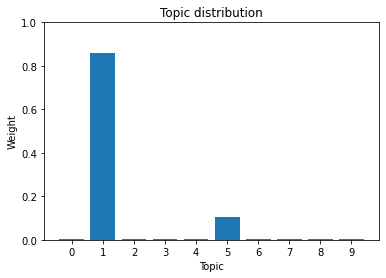

In [271]:
plt.bar(range(n_topics), doc_topic[6,:])
plt.ylim(0, 1)
plt.xticks(range(n_topics), range(n_topics))
plt.title("Topic distribution")
plt.xlabel("Topic")
plt.ylabel("Weight")
plt.show()

In [253]:
print_topics(model.components_, features, 10)

Topic 0: christmas, santa, snow, year, smile, presents, man, children, station, tree
Topic 1: got, started, back, came, saw, time, day, looked, went, found
Topic 2: see, something, around, car, back, looked, eyes, face, road, right
Topic 3: eyes, see, back, feel, something, face, look, around, bed, hear
Topic 4: wife, get, time, good, make, want, go, come, son, people
Topic 5: eyes, looked, back, saw, felt, room, door, began, light, turned
Topic 6: people, time, even, life, world, never, day, every, think, always
Topic 7: door, room, house, phone, open, front, back, window, went, bedroom
Topic 8: family, mother, mom, dad, always, love, little, day, time, say
Topic 9: man, see, back, old, away, eyes, night, john, head, hear


In [254]:
import numpy as np

In [255]:
from utils import get_topic_unique_counts

In [256]:
topic_top_words = get_topics_top_words(model.components_, features, 10)
topic_unique_counts = get_topic_unique_counts(topic_top_words)

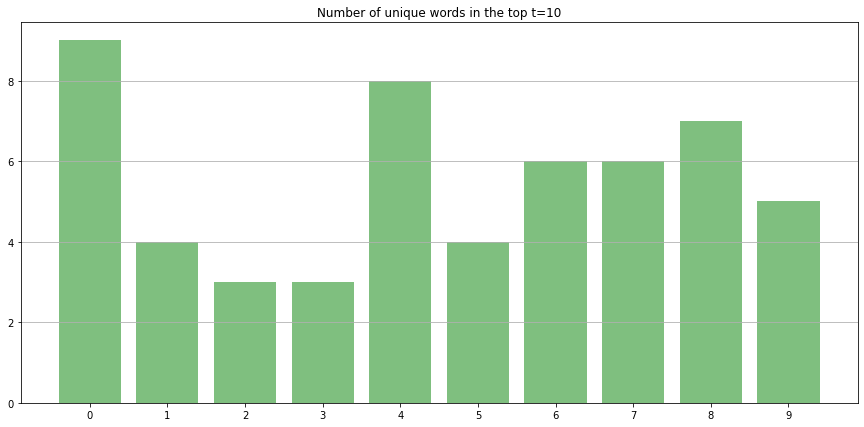

In [257]:
plt.figure(figsize=(15,7))
plt.bar(range(n_topics), topic_unique_counts, color='green', alpha=0.5)
plt.title("Number of unique words in the top t=10")
plt.xticks(range(n_topics), range(n_topics))
plt.gca().yaxis.grid(True)
plt.show()

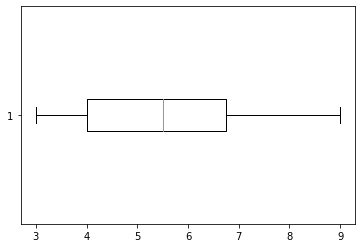

In [258]:
plt.boxplot(topic_unique_counts, vert=False)
plt.show()

In [259]:
from wordcloud import WordCloud

In [284]:
from utils import plot_wordcloud

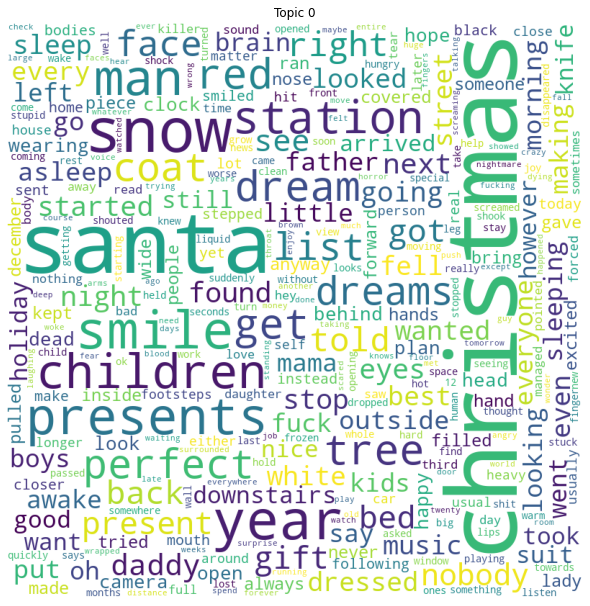

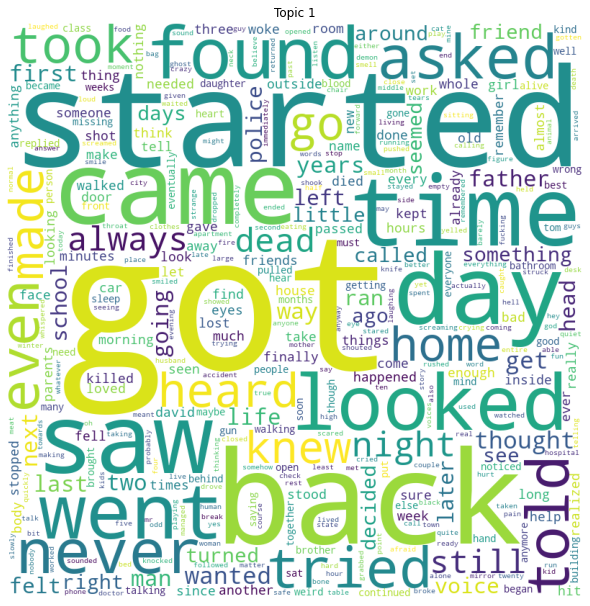

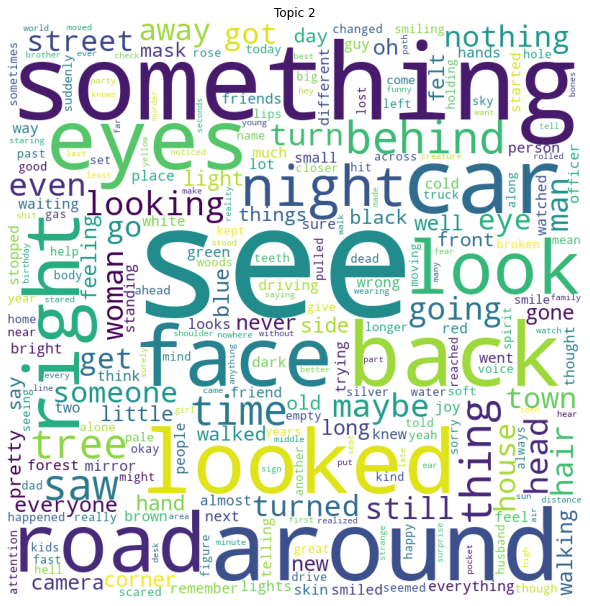

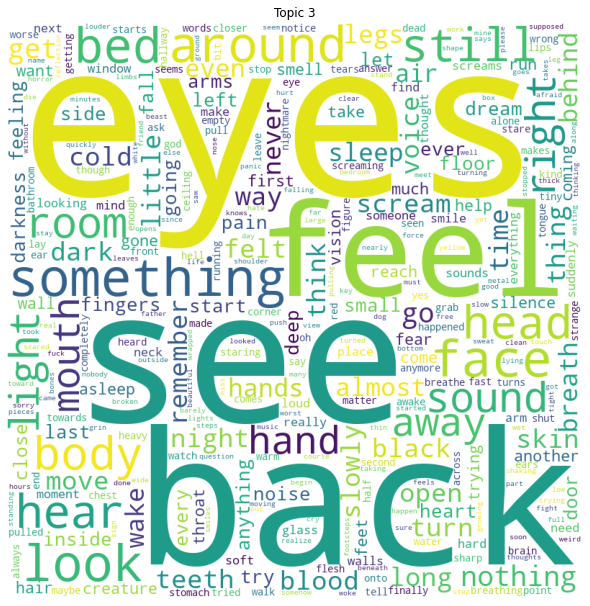

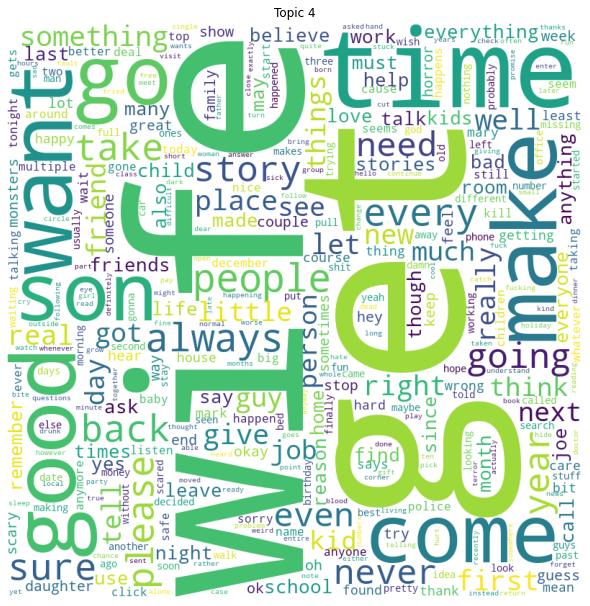

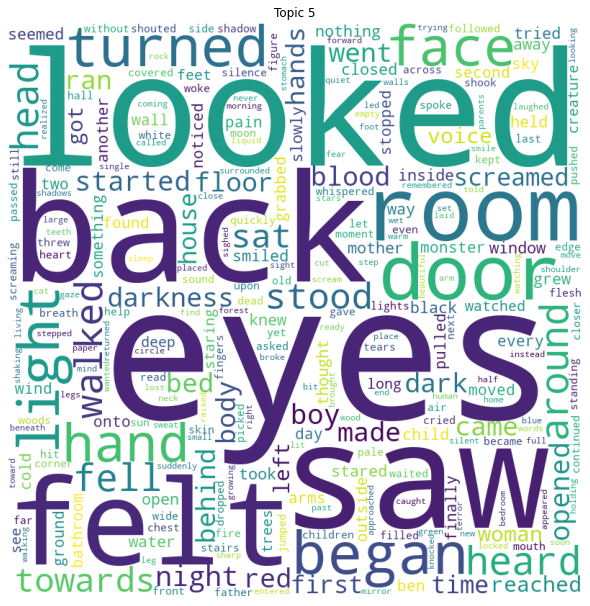

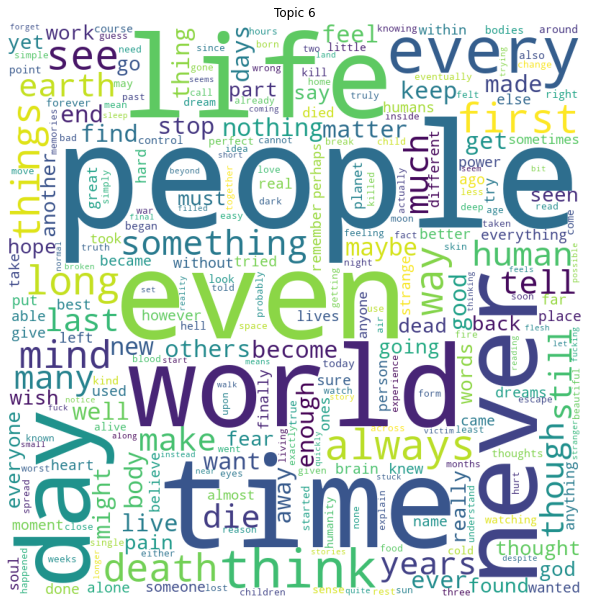

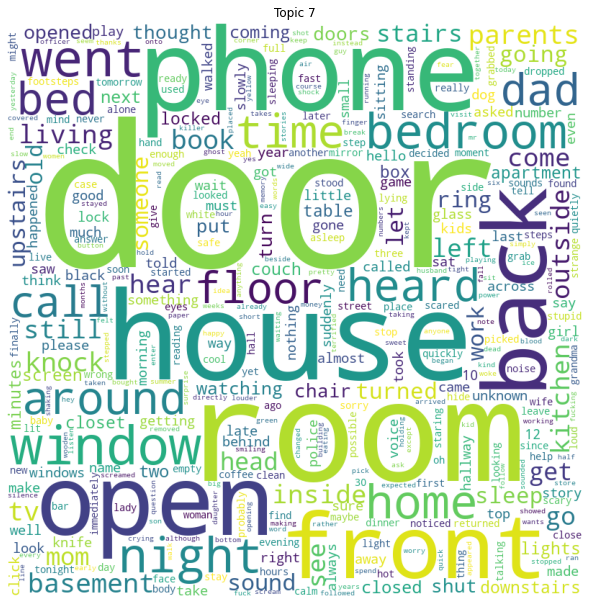

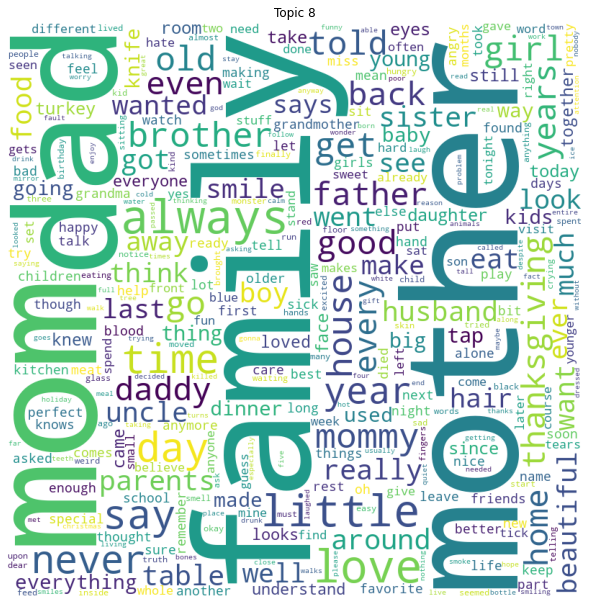

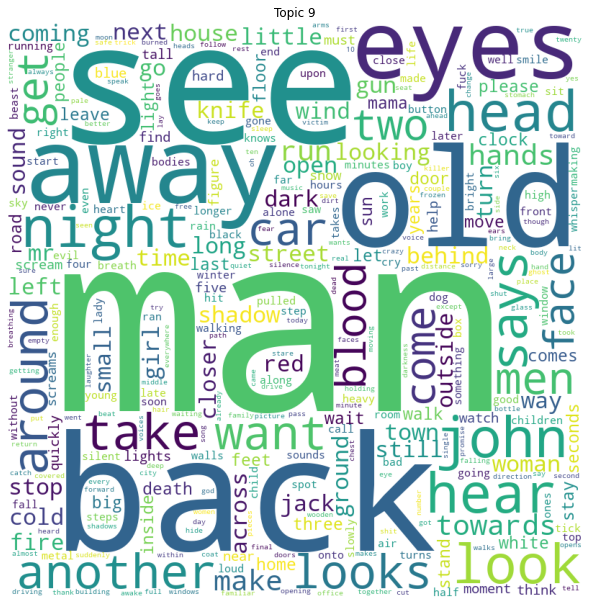

In [261]:
for k in range(model.components_.shape[0]):
    plot_wordcloud(model.components_[k,:], features, title=f"Topic {k}")